# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Sendhy Maula Ammarulloh
- Email: A595YBM451@devacademy.id
- Id Dicoding: A595YBM451

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from google.colab import files

### Menyiapkan data yang akan diguankan

In [2]:
# Data Loading
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv'
df = pd.read_csv(url)

## Data Understanding

In [3]:
# 5 data pertama
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
# Jumlah data kosong
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [6]:
# Set tema visualisasi
sns.set_theme(style="whitegrid")
palette = "Set2"

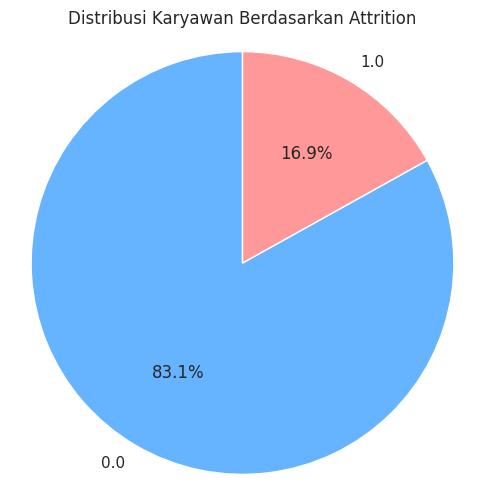

In [7]:
# Hitung jumlah karyawan per kategori Attrition
attrition_counts = df['Attrition'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts,
        labels=attrition_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'])  # warna opsional

plt.title('Distribusi Karyawan Berdasarkan Attrition')
plt.axis('equal')  # agar pie chart berbentuk lingkaran
plt.show()

<ipython-input-8-7c4e1c1d002d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_attrition.values, y=correlation_with_attrition.index, palette='coolwarm')


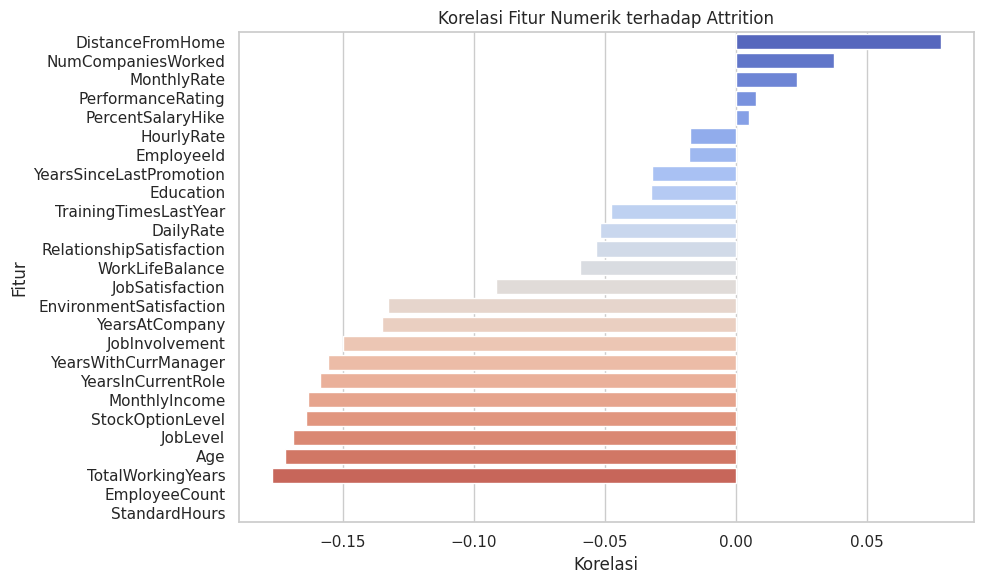

In [8]:
# Korelasi fitur numerik terhadap Attrition
correlation_with_attrition = df.corr(numeric_only=True)['Attrition'].drop('Attrition').sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_attrition.values, y=correlation_with_attrition.index, palette='coolwarm')
plt.title('Korelasi Fitur Numerik terhadap Attrition')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

<ipython-input-9-e42ddc8a48c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")


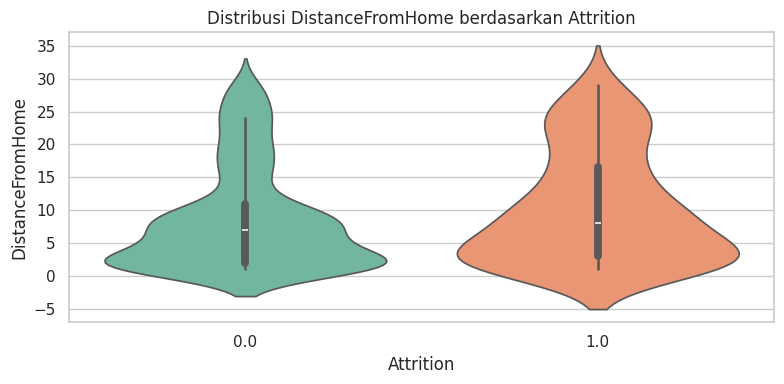

<ipython-input-9-e42ddc8a48c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")


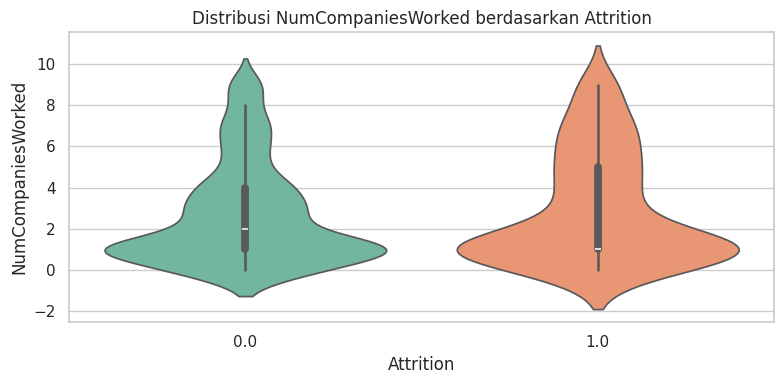

<ipython-input-9-e42ddc8a48c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")


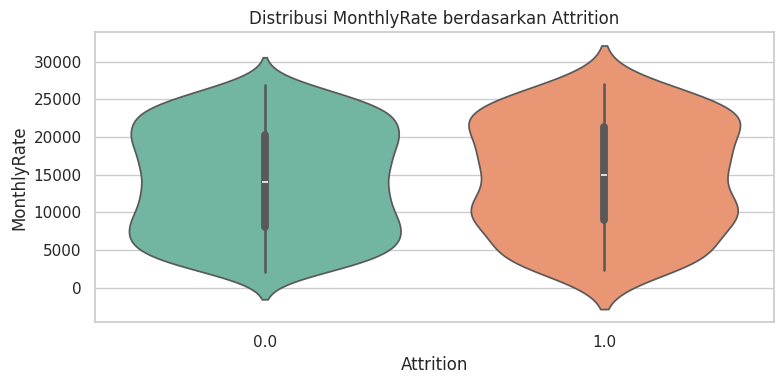

<ipython-input-9-e42ddc8a48c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")


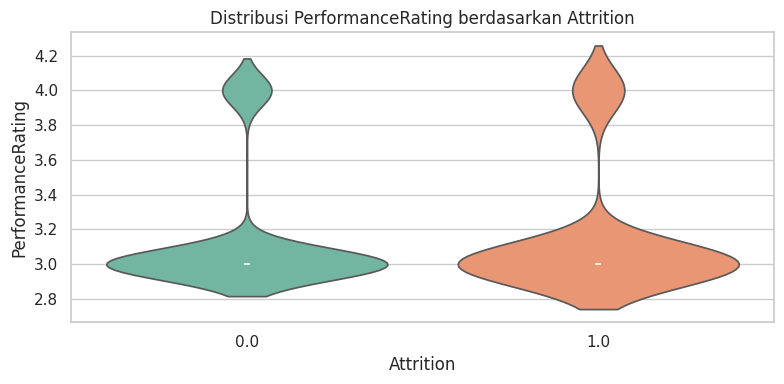

<ipython-input-9-e42ddc8a48c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")


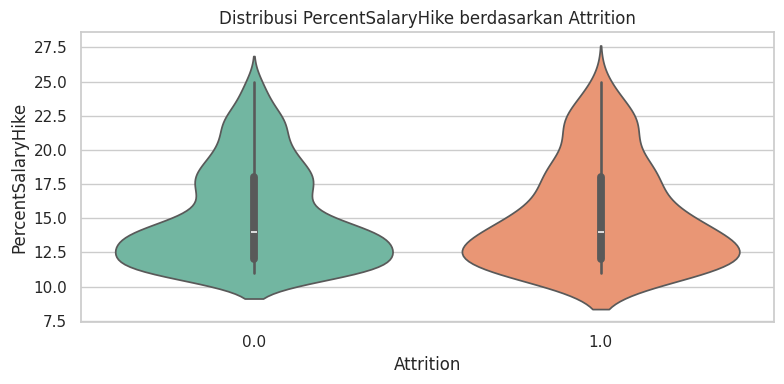

<ipython-input-9-e42ddc8a48c1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")


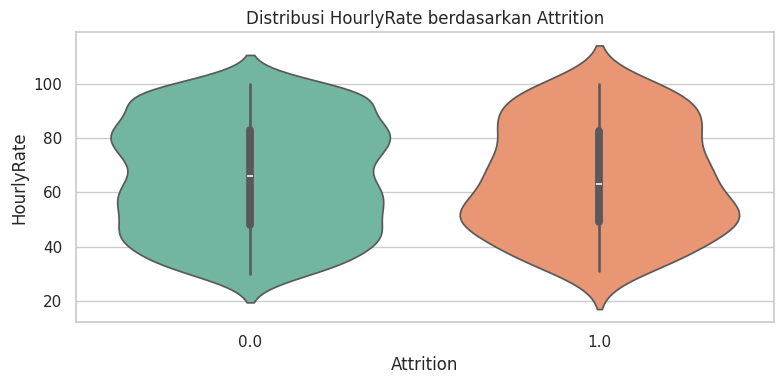

In [9]:
positif_features = [
    'DistanceFromHome',
    'NumCompaniesWorked',
    'MonthlyRate',
    'PerformanceRating',
    'PercentSalaryHike',
    'HourlyRate'
]

sns.set_theme(style="whitegrid")

for feature in positif_features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Attrition', y=feature, data=df, palette="Set2")
    plt.title(f'Distribusi {feature} berdasarkan Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

<ipython-input-10-71a1c21a86fe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_cat_filtered.values, y=corr_cat_filtered.index, palette='coolwarm')


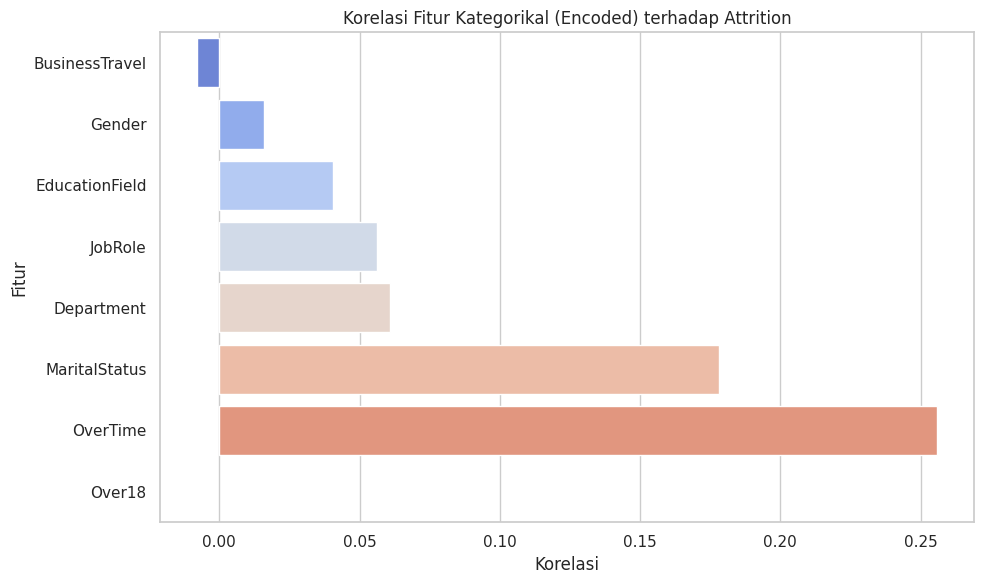

In [10]:
# Korelasi fitur kategorikal terhadap Attrition
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
df_encoded = df_encoded[df_encoded['Attrition'].notna()]
df_encoded['Attrition'] = df_encoded['Attrition'].astype(int)
corr_cat = df_encoded.corr(numeric_only=True)['Attrition'].drop('Attrition')
categorical_cols = df.select_dtypes(include='object').columns
corr_cat_filtered = corr_cat.loc[categorical_cols.intersection(corr_cat.index)].sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=corr_cat_filtered.values, y=corr_cat_filtered.index, palette='coolwarm')
plt.title('Korelasi Fitur Kategorikal (Encoded) terhadap Attrition')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

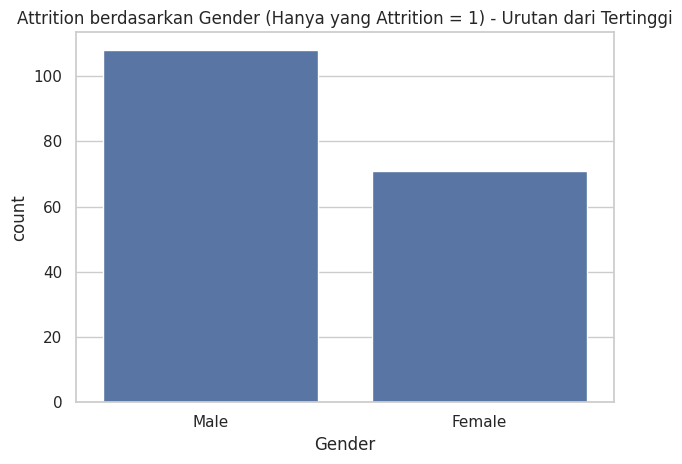

In [11]:
# Filter the DataFrame to include only rows where Attrition is 1
df_filtered = df[df['Attrition'] == 1].copy()

# Urutkan kategori Gender berdasarkan jumlah attrition
sorted_gender = df_filtered['Gender'].value_counts().index

# Visualisasi dengan urutan yang sudah disesuaikan
sns.countplot(x='Gender', data=df_filtered, order=sorted_gender)
plt.title('Attrition berdasarkan Gender (Hanya yang Attrition = 1) - Urutan dari Tertinggi')
plt.tight_layout()
plt.show()

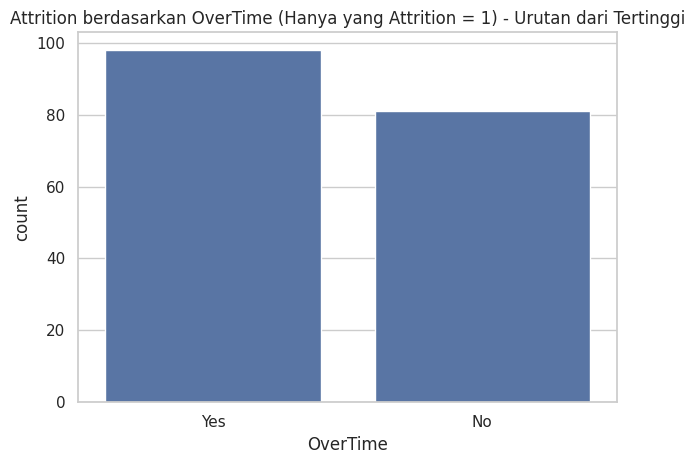

In [12]:
# Urutkan kategori OverTime berdasarkan jumlah attrition
sorted_overtime = df_filtered['OverTime'].value_counts().index

# Visualisasi dengan urutan yang sudah disesuaikan
sns.countplot(x='OverTime', data=df_filtered, order=sorted_overtime)
plt.title('Attrition berdasarkan OverTime (Hanya yang Attrition = 1) - Urutan dari Tertinggi')
plt.tight_layout()
plt.show()

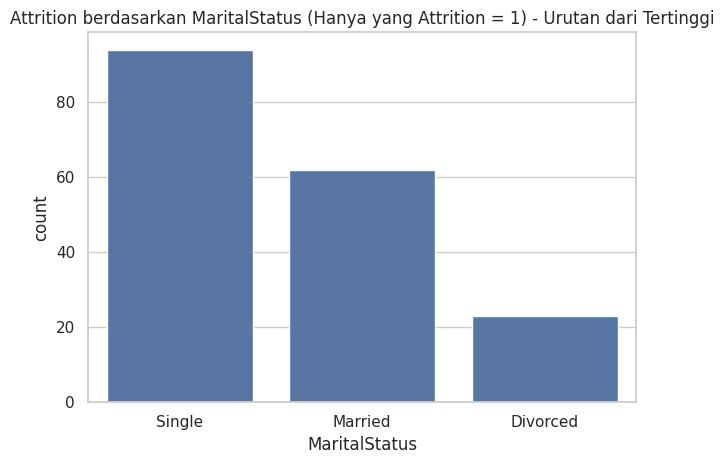

In [13]:
# Urutkan berdasarkan jumlah karyawan yang mengalami attrition (dari tertinggi ke terendah)
sorted_marital_status = df_filtered['MaritalStatus'].value_counts().index

# Visualisasi dengan urutan yang sudah disesuaikan
sns.countplot(x='MaritalStatus', data=df_filtered, order=sorted_marital_status)
plt.title('Attrition berdasarkan MaritalStatus (Hanya yang Attrition = 1) - Urutan dari Tertinggi')
plt.tight_layout()
plt.show()

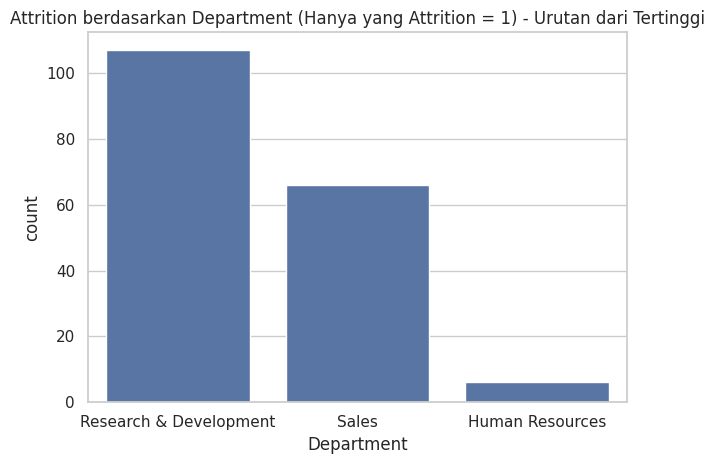

In [14]:
# Urutkan berdasarkan jumlah attrition dari tinggi ke rendah
sorted_departments = df_filtered['Department'].value_counts().index

# Visualisasi dengan urutan yang sudah disesuaikan
sns.countplot(x='Department', data=df_filtered, order=sorted_departments)
plt.title('Attrition berdasarkan Department (Hanya yang Attrition = 1) - Urutan dari Tertinggi')
plt.tight_layout()
plt.show()

<ipython-input-15-f5b01a5615c9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='JobRole', data=df_filtered, order=sorted_roles, palette=palette)


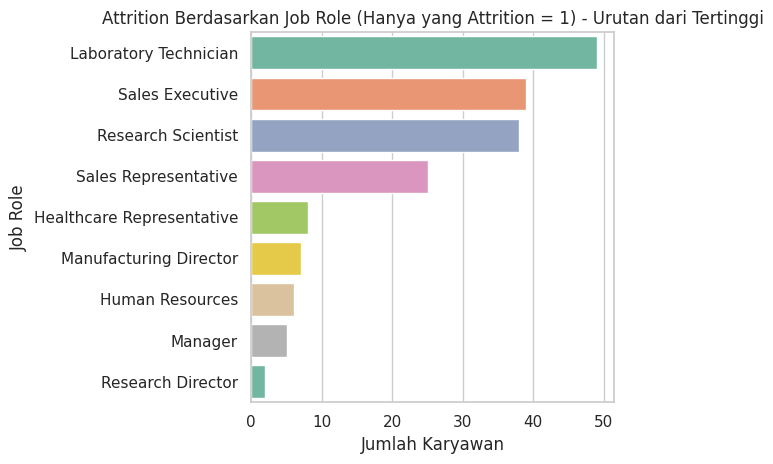

In [15]:
# Urutkan berdasarkan jumlah karyawan yang mengalami attrition (dari tinggi ke rendah)
sorted_roles = df_filtered['JobRole'].value_counts().index

# Visualisasi dengan urutan yang sudah disesuaikan
sns.countplot(y='JobRole', data=df_filtered, order=sorted_roles, palette=palette)
plt.title('Attrition Berdasarkan Job Role (Hanya yang Attrition = 1) - Urutan dari Tertinggi')
plt.xlabel('Jumlah Karyawan')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

<ipython-input-16-796555b019b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='EducationField', data=df_filtered, order=sorted_education, palette=palette)


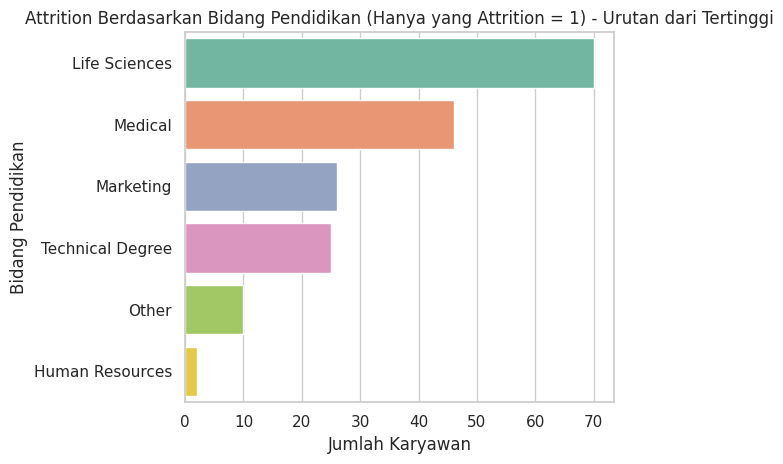

In [16]:
sorted_education = df_filtered['EducationField'].value_counts().index

sns.countplot(y='EducationField', data=df_filtered, order=sorted_education, palette=palette)
plt.title('Attrition Berdasarkan Bidang Pendidikan (Hanya yang Attrition = 1) - Urutan dari Tertinggi')
plt.xlabel('Jumlah Karyawan')
plt.ylabel('Bidang Pendidikan')
plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

In [17]:
# Menemukan kolom yang hanya memiliki satu nilai unik
single_value_columns = df.nunique()[df.nunique() == 1].index.tolist()

print("Kolom dengan satu nilai unik:", single_value_columns)

Kolom dengan satu nilai unik: ['EmployeeCount', 'Over18', 'StandardHours']


In [18]:
# Pisahkan data berlabel dan tidak berlabel
df_labeled = df[df['Attrition'].notna()]
df_unlabeled = df[df['Attrition'].isna()]

# Lanjutkan pelatihan hanya dengan df_labeled
df_labeled['Attrition'] = df_labeled['Attrition'].astype(int)

<ipython-input-18-fbe97dcd7cfa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Attrition'] = df_labeled['Attrition'].astype(int)


In [19]:
# Drop kolom yang tidak berguna
df_labeled.drop(columns=['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

<ipython-input-19-ff382f0f494d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled.drop(columns=['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)


In [20]:
# One-hot encoding
df_encoded = pd.get_dummies(df_labeled, drop_first=True)

In [21]:
df_encoded

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1,37,1,1141,11,2,1,61,1,2,2,...,False,False,False,False,False,False,False,True,False,False
2,51,1,1323,4,4,1,34,3,1,3,...,False,False,False,False,True,False,False,True,False,True
3,42,0,555,26,3,3,77,3,4,2,...,False,False,False,False,False,True,False,True,False,False
6,40,0,1124,1,2,2,57,1,2,4,...,False,False,False,False,False,True,False,True,False,True
7,55,1,725,2,3,4,78,3,5,1,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1,1366,24,2,2,72,2,3,1,...,False,False,False,False,False,False,False,False,True,False
1465,38,0,168,1,3,3,81,3,3,3,...,False,False,True,False,False,False,False,False,True,True
1467,28,1,1485,12,1,3,79,3,1,4,...,True,False,False,False,False,False,False,True,False,True
1468,40,0,458,16,2,3,74,3,1,3,...,False,False,False,False,True,False,False,False,False,False


In [22]:
# Pisahkan fitur dan target
X = df_encoded.drop(columns='Attrition')
y = df_encoded['Attrition']

In [23]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [24]:
    model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [25]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[173   0]
 [ 33   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       173
           1       1.00      0.15      0.27        39

    accuracy                           0.84       212
   macro avg       0.92      0.58      0.59       212
weighted avg       0.87      0.84      0.79       212



<ipython-input-26-a6b1efb6faa8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_sorted.values[:15], y=feature_importance_sorted.index[:15], palette='viridis')


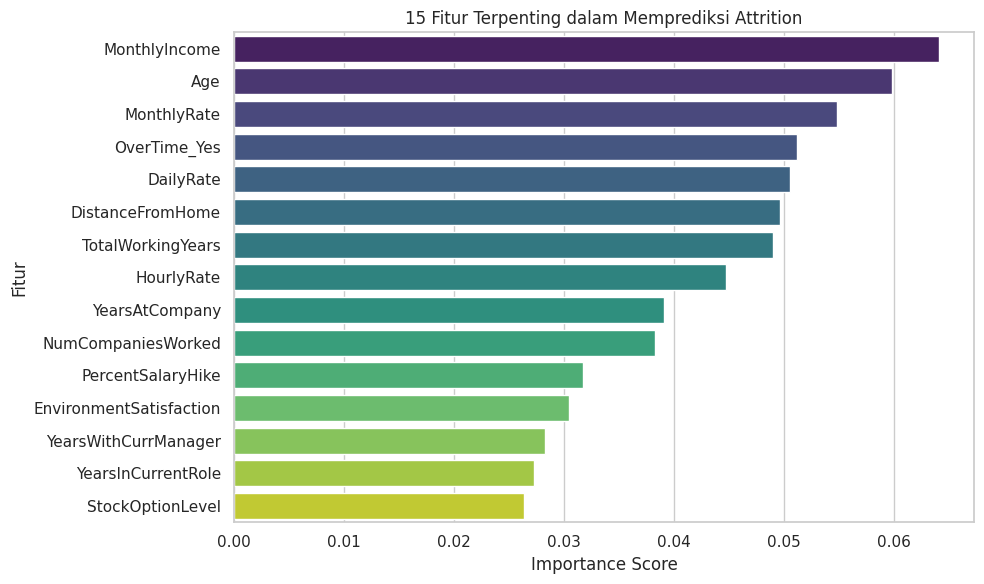

In [26]:
# Ambil pentingnya fitur dari model
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Urutkan berdasarkan nilai pentingnya
feature_importance_sorted = feature_importance.sort_values(ascending=False)

# Visualisasikan 15 fitur teratas
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance_sorted.values[:15], y=feature_importance_sorted.index[:15], palette='viridis')
plt.title('15 Fitur Terpenting dalam Memprediksi Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

In [27]:
# Simpan model ke file .pkl
joblib.dump(model, 'random_forest_attrition_model.pkl')

# Simpan kolom fitur yang digunakan
joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

In [28]:
df_unlabeled.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7


In [29]:
# Simpan DataFrame tanpa label ke file .csv
df_unlabeled.to_csv('df_unlabeled_tanpa_hasil_prediksi.csv', index=False)

# Unduh file
files.download('df_unlabeled_tanpa_hasil_prediksi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>